In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

df = pd.read_csv("../data/angles/experiment_results.csv")

metrics = ['Dice 3D [%]', 'IoU 3D [%]', 'Chamfer distance 3D [mm]']

condition_num = []
gram = []
for index, row in df.iterrows():
    base = np.array([
        [row['v0_x'], row['v0_y']],
        [row['v1_x'], row['v1_y']],
        [row['v2_x'], row['v2_y']]
    ]).T
    U, S, Vt = np.linalg.svd(base)
    condition_number = S[0] / S[-1] if S[-1] != 0 else np.inf
    condition_num.append(condition_number)
    gram.append(np.linalg.det(base.T @ base))


df["Condition number"] = condition_num
df["Gram matrix determinant"] = gram
df


,Unnamed: 0,v0_x,v0_y,v1_x,v1_y,v2_x,v2_y,Singular_2,Time [s],Dice 3D [%],IoU 3D [%],Chamfer distance 3D [mm],Avg IoU 2D [%],Avg Dice 2D [%],Condition number,Gram matrix determinant
0,0,-0.136437,-0.990649,-0.094809,0.995495,-0.993188,0.116519,1.004132,NaN,58.273381,41.116751,2.167473,NaN,NaN,1.405475,-1.695603e-17
1,1,0.648581,-0.761145,-0.811116,-0.584886,-0.428584,0.903502,1.014443,NaN,63.074901,46.065259,1.521400,NaN,NaN,1.383901,-1.439368e-16
2,2,-0.620703,-0.784046,-0.838213,-0.545343,-0.511805,0.859102,0.986926,NaN,62.094763,45.027125,2.083661,NaN,NaN,1.442224,-3.410716e-16
3,3,0.313873,-0.949465,0.680944,-0.732336,-0.723110,0.690732,0.372887,NaN,55.701754,38.601824,2.570255,NaN,NaN,4.536050,-3.161076e-17
4,4,-0.811534,-0.584305,-0.982608,0.185690,0.092459,-0.995716,1.122626,NaN,76.131045,61.460957,1.084923,NaN,NaN,1.174907,1.761946e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,0.986394,0.164399,0.807480,0.589895,0.863014,-0.505179,0.779067,NaN,75.657895,60.846561,1.112348,NaN,NaN,1.985645,-5.164310e-17
146,146,0.971211,0.238222,-0.215587,-0.976485,0.614331,0.789049,0.750936,NaN,71.703704,55.889145,1.151601,NaN,NaN,2.078473,2.356079e-17
147,147,-0.962013,0.273004,-0.437021,-0.899451,-0.999635,0.027017,0.935759,NaN,59.427208,42.275042,3.114743,NaN,NaN,1.557577,1.171448e-16
148,148,-0.848897,0.528558,-0.505719,0.862698,0.673754,-0.738956,0.339701,NaN,73.805601,58.485640,1.022530,NaN,NaN,4.999732,1.118917e-17


Correlation for Gram matrix determinant and Dice 3D [%] = -0.03147204579031536
Correlation for Gram matrix determinant and IoU 3D [%] = -0.03274459654265973
Correlation for Gram matrix determinant and Chamfer distance 3D [mm] = 0.03200558504687833


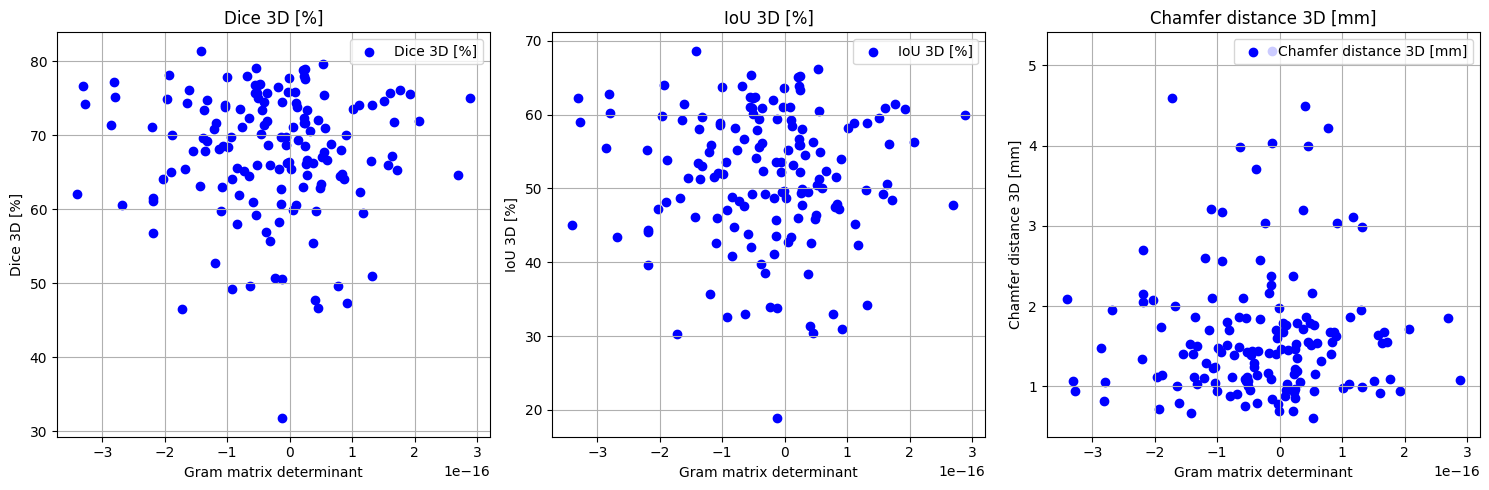

In [ ]:
from scipy.stats import pearsonr

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ivs = ["Gram matrix determinant", "Condition number", "Singular_2"]

ivar = ivs[0]
for i, metric in enumerate(metrics):
    axes[i].scatter(df[ivar], df[metric], marker='o', linestyle='-', color='b', label=metric)
    axes[i].set_title(metric)
    axes[i].set_xlabel(ivar)
    axes[i].set_ylabel(metric)
    axes[i].legend()
    axes[i].grid(True)

for metric in metrics:
    pearson_corr, _ = pearsonr(df[ivar], df[metric])
    print(f"Correlation for {ivar} and {metric} = {pearson_corr}")

plt.tight_layout()
plt.savefig('figures/metric_angles_gram.png')
plt.show()

Correlation for Condition number and Dice 3D [%] = -0.09071389207814956
Correlation for Condition number and IoU 3D [%] = -0.0862786651954499
Correlation for Condition number and Chamfer distance 3D [mm] = 0.047377287948253397


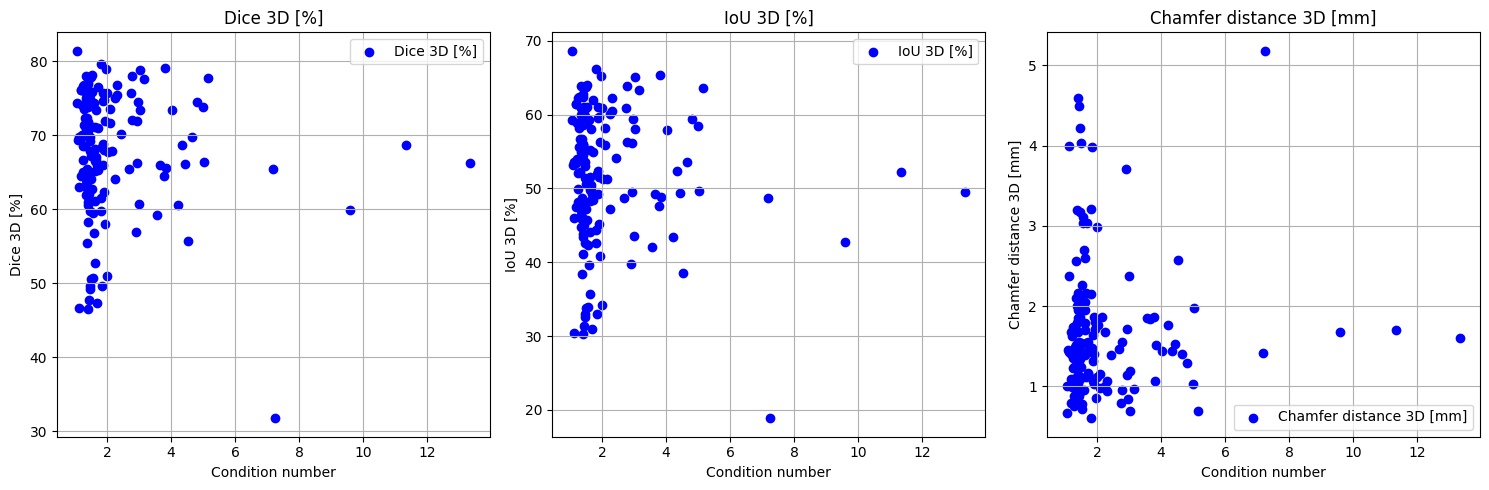

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ivar = ivs[1]
for i, metric in enumerate(metrics):
    axes[i].scatter(df[ivar], df[metric], marker='o', linestyle='-', color='b', label=metric)
    axes[i].set_title(metric)
    axes[i].set_xlabel(ivar)
    axes[i].set_ylabel(metric)
    axes[i].legend()
    axes[i].grid(True)

for metric in metrics:
    pearson_corr, _ = pearsonr(df[ivar], df[metric])
    print(f"Correlation for {ivar} and {metric} = {pearson_corr}")

plt.tight_layout()
plt.savefig('figures/metric_angles_cond.png')
plt.show()

Correlation for Singular_2 and Dice 3D [%] = 0.050114340755071186
Correlation for Singular_2 and IoU 3D [%] = 0.045219296354768436
Correlation for Singular_2 and Chamfer distance 3D [mm] = -0.023861090443220396


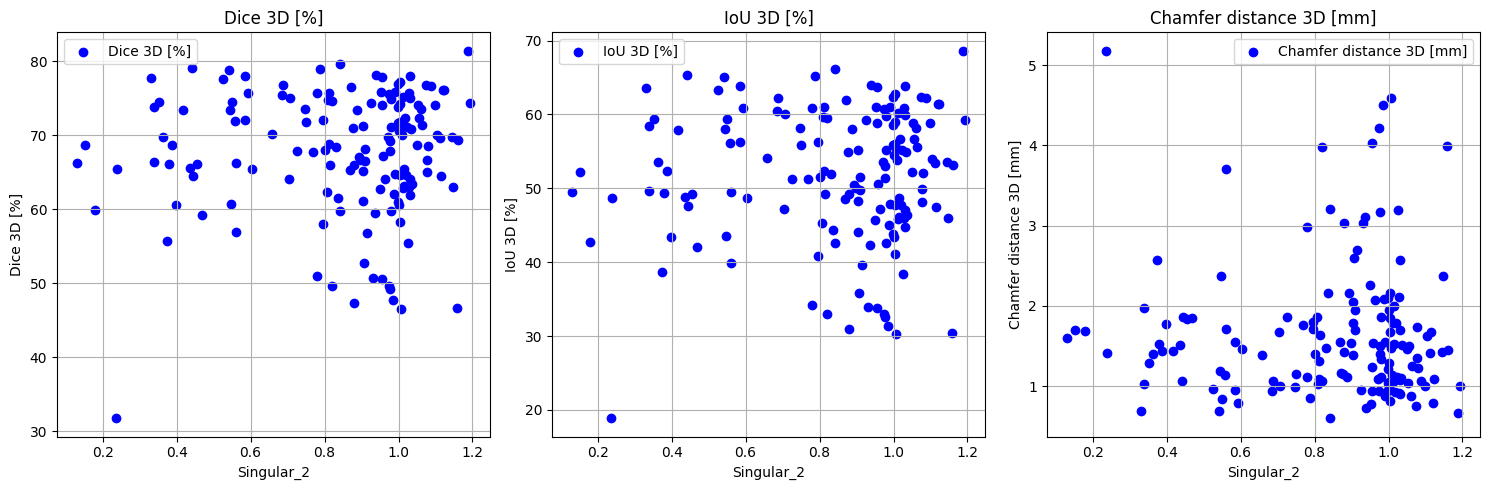

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

ivar = ivs[2]
for i, metric in enumerate(metrics):
    axes[i].scatter(df[ivar], df[metric], marker='o', linestyle='-', color='b', label=metric)
    axes[i].set_title(metric)
    axes[i].set_xlabel(ivar)
    axes[i].set_ylabel(metric)
    axes[i].legend()
    axes[i].grid(True)

for metric in metrics:
    pearson_corr, _ = pearsonr(df[ivar], df[metric])
    print(f"Correlation for {ivar} and {metric} = {pearson_corr}")

plt.tight_layout()
plt.savefig('figures/metric_angles_singular.png')
plt.show()